# Final Project: JBNav
> ### A Simple Python Library for Running Autonomous Vehicle Image Processing Pipelines with CARLA
> #### By: Bruno Janota and James Milliman
#### Due: Friday, 5/14 at 11:59 pm ET

The goals / steps of this project are to use CARLA simulation video and associated control/state information to train a deep learning model to imitate the simulated driver based on image input. In this notebook, we will focus on simulating a single driver action, namely, the steering angle. In future efforts, we may attempt to predict additional control states such as gas and brake, as well.

The dataset can be downloaded [here](https://drive.google.com/file/d/1hloAeyamYn-H6MfV1dRtY1gJPhkR55sY/view) (24 GB). The data is stored in two sub-directories `SeqTrain` which consists of 3,289 HDF5 files and `SeqVal` which contains 374 HDF5 files.

Each HDF5 contains two "datasets":
- 'rbg': 200 RGB images stored at 200x88 resolution
- 'targets': 28 controls and measurements collected during the simulation run

#### Environment Requirements

- h5py==2.10.0
- ipykernel==5.5.3
- matplotlib==3.4.1
- numpy==1.19.5
- opencv-python==4.5.1.48
- pandas==1.1.5
- seaborn==0.11.1
- tensorflow==2.4.1

To run this notebook in a local environment:

> 1. Open command line tool (Terminal for MacOS, Anaconda Prompt for Windows)
> 2. Run conda create -n <env_name> python==3.7 
> 3. Activate the conda environment: source activate <env_name> on Terminal or conda activate <env_name> on Anaconda Prompt. 
> 4. Once your environment is active, run pip install -r requirements.txt which will install the required packages into your environment.
> 5. Next run python -m ipykernel install --user --name <env_name> --display-name "<env_name> (Python3)" => This will add a json object to an ipython file, so JupterLab will know that it can use this isolated instance of Python.

In [2]:
import os
import h5py
import numpy as np
import pandas as pd
pd.options.display.max_columns = 50

import matplotlib.pyplot as plt
%matplotlib inline

## Load Training Data for Imitation Learning

In [3]:
# Column names for controls data
columns = ['Steer', 'Gas', 'Brake', 'Hand Brake', 'Reverse Gear', 'Steer Noise', 'Gas Noise', 'Brake Noise', 'Position X', 'Position Y', 'Speed', 'Collision Other', 
           'Collision Pedestrian', 'Collision Car', 'Opposite Lane Inter', 'Sidewalk Inter', 'Acceleration X', 'Acceleration Y', 'Acceleration Z', 'Platform Time', 
           'Game Time', 'Orientiation X', 'Orientation Y', 'Orientation Z',  'High Level Command', 'Noise', 'Camera', 'Camera Yaw Angle']

directory = "./AgentHuman/SeqTrain"
num_imgs = 50000   # Load this many images and corresponding state/controls
num_files = int(num_imgs / 200)

all_imgs = []
all_dfs = []
for filename in os.listdir(directory)[0:num_files]:
    try:
        if filename.endswith(".h5"):
            with h5py.File(os.path.join(directory, filename), "r") as f:
                # Get the data
                imgs = list(f['rgb'])
                targets = list(f['targets'])

                # Convert to dataframe
                df = pd.DataFrame(targets, columns=columns)
                df['Scenario Filename'] = filename

            all_imgs.extend(imgs)
            all_dfs.append(df)

        if len(all_imgs) % 10000 == 0:
            print(f'Loaded {len(all_imgs)} images...')
    except:
        pass

# Combine all dataframes
final_df = pd.concat(all_dfs)
    
print(f'Number of Images: {len(all_imgs)}')
print(f'Image Shape: {all_imgs[0].shape}')
print(final_df.shape)
final_df.head(3)

Loaded 10000 images...
Loaded 20000 images...
Loaded 30000 images...
Loaded 40000 images...
Loaded 50000 images...
Number of Images: 50000
Image Shape: (88, 200, 3)
(50000, 29)


,Steer,Gas,Brake,Hand Brake,Reverse Gear,Steer Noise,Gas Noise,Brake Noise,Position X,Position Y,Speed,Collision Other,Collision Pedestrian,Collision Car,Opposite Lane Inter,Sidewalk Inter,Acceleration X,Acceleration Y,Acceleration Z,Platform Time,Game Time,Orientiation X,Orientation Y,Orientation Z,High Level Command,Noise,Camera,Camera Yaw Angle,Scenario Filename
0,-0.039811,0.5,0.0,0.0,0.0,-0.039811,0.5,0.0,13088.663086,33021.835938,16.134987,0.0,0.0,0.0,0.0,0.0,0.220270,-1.431091,0.001805,958258944.0,57151.0,0.998827,0.048428,0.000318,2.0,0.0,0.0,0.0,data_03663.h5
1,-0.035458,0.5,0.0,0.0,0.0,-0.035458,0.5,0.0,13118.545898,33022.570312,16.143417,0.0,0.0,0.0,0.0,0.0,0.185251,-1.280319,-0.000220,958259136.0,57218.0,0.999070,0.043115,0.000317,2.0,0.0,0.0,0.0,data_03663.h5
2,-0.031573,0.5,0.0,0.0,0.0,-0.031573,0.5,0.0,13148.444336,33023.210938,16.150740,0.0,0.0,0.0,0.0,0.0,0.156584,-1.144311,-0.001294,958259328.0,57285.0,0.999263,0.038372,0.000312,2.0,0.0,0.0,0.0,data_03663.h5


(200, 29)


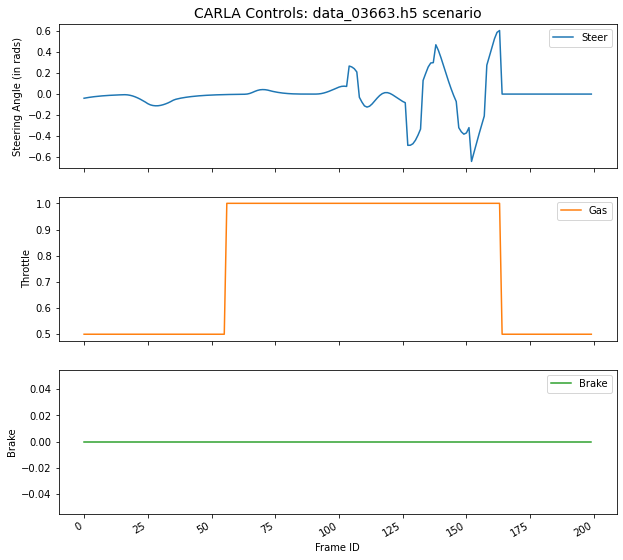

In [4]:
scenario = 'data_03663.h5'

sub_df = final_df[final_df['Scenario Filename'] == scenario]
print(sub_df.shape)

axes = sub_df[['Steer', 'Gas', 'Brake']].plot(subplots=True, figsize=(10,10))
axes[0].set_title(f'CARLA Controls: {scenario} scenario', fontsize=14)
axes[0].set_ylabel('Steering Angle (in rads)')
axes[1].set_ylabel('Throttle')
axes[2].set_ylabel('Brake')
axes[2].set_xlabel('Frame ID');

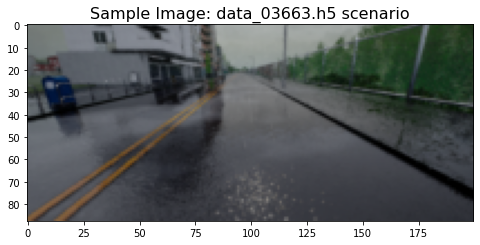

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(all_imgs[0])
plt.grid(False)
plt.title(f'Sample Image: {scenario} scenario', fontsize=16);

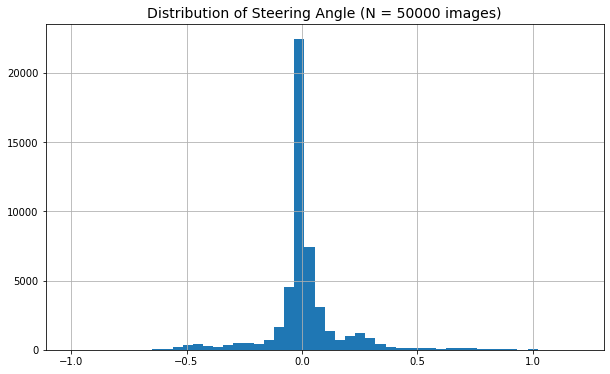

In [6]:
final_df.Steer.hist(bins=50, figsize=(10,6))
plt.title(f'Distribution of Steering Angle (N = {final_df.shape[0]} images)', fontsize=14);

In [15]:
import random
random.seed(42)

# Split into train/validation set
scene_ids = list(final_df['Scenario Filename'].unique())
n_train = round(len(scene_ids) * 0.8)
train_scene_ids = random.sample(scene_ids, n_train)

# Filter labels
train = final_df[final_df['Scenario Filename'].isin(train_scene_ids)].reset_index(drop=True)
test = final_df[~final_df['Scenario Filename'].isin(train_scene_ids)].reset_index(drop=True)
y_train = train['Steer']
y_test = test['Steer']

# Filter images to train/test
X_train_imgs = np.array([all_imgs[x] for x in train.index])
X_test_imgs = np.array([all_imgs[x] for x in test.index])
print(X_train_imgs.shape, X_test_imgs.shape, y_train.shape, y_test.shape)

(40000, 88, 200, 3) (10000, 88, 200, 3) (40000,) (10000,)


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

# Setup Architecture
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=X_train_imgs[0].shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

# Compile Model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 86, 198, 32)       896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 43, 99, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 41, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 20, 48, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 18, 46, 64)        36928     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 23, 64)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 13248)            

In [19]:
# Fit Model
cnn_hist = model.fit(X_train_imgs, y_train, 
                     epochs=5, 
                     validation_data=(X_test_imgs, y_test))

Epoch 1/5
1250/1250 [==============================] - 576s 461ms/step - loss: 723.8359 - mae: 3.0442 - val_loss: 0.0268 - val_mae: 0.1008
Epoch 2/5
1250/1250 [==============================] - 535s 428ms/step - loss: 0.0281 - mae: 0.0929 - val_loss: 0.0244 - val_mae: 0.0866
Epoch 3/5
1250/1250 [==============================] - 537s 430ms/step - loss: 0.0275 - mae: 0.0928 - val_loss: 0.0264 - val_mae: 0.0981
Epoch 4/5
1250/1250 [==============================] - 553s 442ms/step - loss: 0.0262 - mae: 0.0933 - val_loss: 0.0278 - val_mae: 0.0958
Epoch 5/5
1250/1250 [==============================] - 575s 460ms/step - loss: 0.0251 - mae: 0.0909 - val_loss: 0.0258 - val_mae: 0.0919


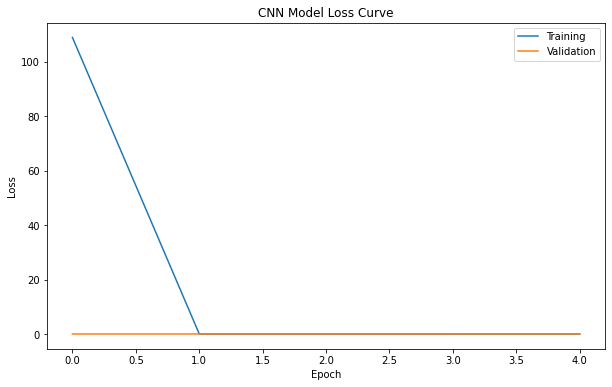

In [20]:
plt.figure(figsize=(10,6))
plt.plot(cnn_hist.epoch, cnn_hist.history['loss'], label='Training')
plt.plot(cnn_hist.epoch, cnn_hist.history['val_loss'], label='Validation')
plt.legend()
plt.title('CNN Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [21]:
y_test_pred = model.predict(X_test_imgs)
y_test_pred[0:5]

array([[0.0361351 ],
       [0.05511385],
       [0.0298376 ],
       [0.03647243],
       [0.01889286]], dtype=float32)

In [22]:
test['Steer Prediction'] = y_test_pred
test['Steer Prediction'].describe()

count    10000.000000
mean         0.015791
std          0.049129
min         -1.214191
25%          0.002715
50%          0.016705
75%          0.031824
max          0.400315
Name: Steer Prediction, dtype: float64

In [27]:
test['Error'] = np.abs(test['Steer'] - test['Steer Prediction'])
test.groupby('Scenario Filename')['Error'].mean().sort_values()

Scenario Filename
data_03748.h5    0.046172
data_03789.h5    0.046306
data_03906.h5    0.051657
data_03830.h5    0.053564
data_03767.h5    0.055277
data_03675.h5    0.055843
data_03847.h5    0.056020
data_03735.h5    0.057650
data_03752.h5    0.058151
data_03812.h5    0.058256
data_03786.h5    0.058624
data_03741.h5    0.059659
data_03776.h5    0.059835
data_03666.h5    0.062796
data_03714.h5    0.064894
data_03886.h5    0.065777
data_03708.h5    0.066752
data_03876.h5    0.067009
data_03872.h5    0.067852
data_03672.h5    0.069073
data_03742.h5    0.073863
data_03684.h5    0.074353
data_03707.h5    0.076115
data_03673.h5    0.078865
data_03761.h5    0.079240
data_03796.h5    0.080048
data_03778.h5    0.082934
data_03766.h5    0.083413
data_03729.h5    0.085058
data_03859.h5    0.090248
data_03768.h5    0.093750
data_03762.h5    0.096235
data_03862.h5    0.103374
data_03827.h5    0.105950
data_03863.h5    0.110484
data_03897.h5    0.112052
data_03692.h5    0.115382
data_03839.h5    0.1

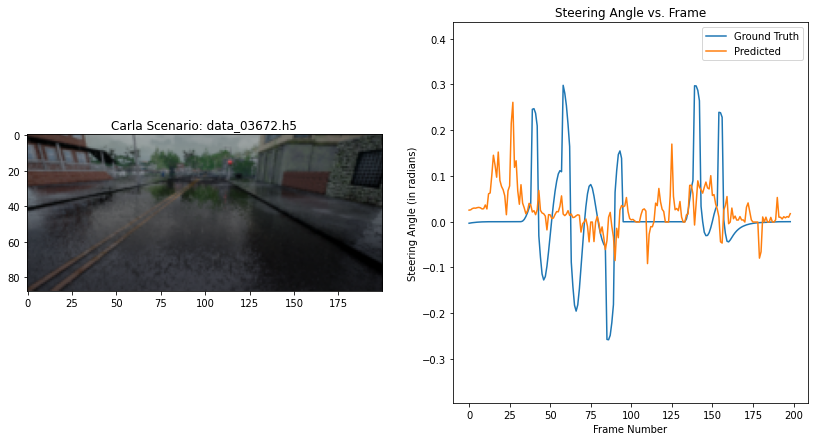

In [29]:
import cv2
import matplotlib.animation as animation
from IPython.display import display, clear_output

# Select a scene to plot
scenario = 'data_03672.h5'
sample_test_ids = test[test['Scenario Filename'] == scenario].index.values

# Get data for plots
frame = np.array(range(0, len(sample_test_ids))) 
truth_steering_angles = y_test[sample_test_ids]
pred_steering_angles = y_test_pred[sample_test_ids]
sample_imgs = X_test_imgs[sample_test_ids]

# Create the image animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
im = ax1.imshow(X_test_imgs[0])
ax1.set_title(f'Carla Scenario: {scenario}')

dat1, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
dat2, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
ax2.set_title('Steering Angle vs. Frame')
ax2.set_xlabel('Frame Number')
ax2.set_ylabel('Steering Angle (in radians)')
ax2.legend(['Ground Truth', 'Predicted'])

animate_image = lambda i: im.set_array(sample_imgs[i])
animate_data1 = lambda i: dat1.set_data(frame[:i], truth_steering_angles[:i])
animate_data2 = lambda i: dat2.set_data(frame[:i], pred_steering_angles[:i])

for i in range(len(frame)):
    animate_image(i)
    animate_data1(i)
    animate_data2(i)
    clear_output(wait=True)
    display(fig)
    plt.show()

In [32]:
y_train_pred = model.predict(X_train_imgs)
train['Steer Prediction'] = y_train_pred

In [33]:
train['Error'] = np.abs(train['Steer'] - train['Steer Prediction'])
train.groupby('Scenario Filename')['Error'].mean().sort_values()[0:10]

Scenario Filename
data_03852.h5    0.034582
data_03853.h5    0.036435
data_03730.h5    0.039078
data_03743.h5    0.039229
data_03800.h5    0.039317
data_03775.h5    0.040375
data_03884.h5    0.041637
data_03880.h5    0.043408
data_03814.h5    0.043471
data_03881.h5    0.044948
Name: Error, dtype: float64

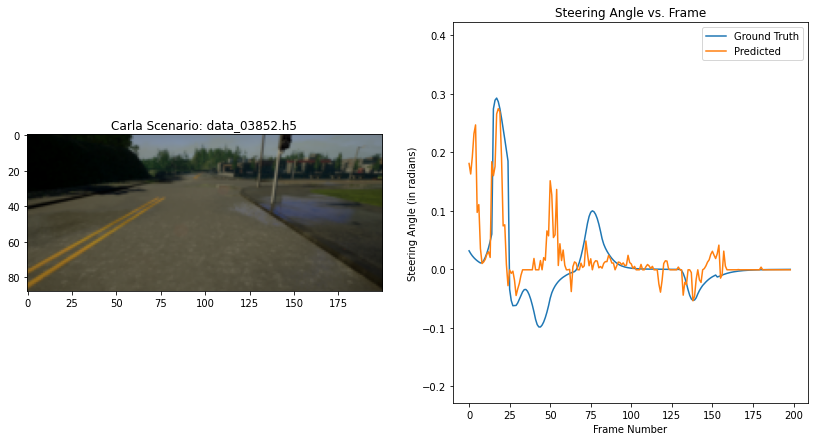

In [36]:
import cv2
import matplotlib.animation as animation
from IPython.display import display, clear_output

# Select a scene to plot
scenario = 'data_03852.h5'
sample_test_ids = train[train['Scenario Filename'] == scenario].index.values

# Get data for plots
frame = np.array(range(0, len(sample_test_ids))) 
truth_steering_angles = y_train[sample_test_ids]
pred_steering_angles = y_train_pred[sample_test_ids]
sample_imgs = X_train_imgs[sample_test_ids]

# Create the image animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
im = ax1.imshow(X_train_imgs[0])
ax1.set_title(f'Carla Scenario: {scenario}')

dat1, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
dat2, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
ax2.set_title('Steering Angle vs. Frame')
ax2.set_xlabel('Frame Number')
ax2.set_ylabel('Steering Angle (in radians)')
ax2.legend(['Ground Truth', 'Predicted'])

animate_image = lambda i: im.set_array(sample_imgs[i])
animate_data1 = lambda i: dat1.set_data(frame[:i], truth_steering_angles[:i])
animate_data2 = lambda i: dat2.set_data(frame[:i], pred_steering_angles[:i])

for i in range(len(frame)):
    animate_image(i)
    animate_data1(i)
    animate_data2(i)
    clear_output(wait=True)
    display(fig)
    plt.show()

## Multi-Input Deep Convolutional Neural Network

In [37]:
import random
random.seed(42)

# Split into train/validation set
scene_ids = list(final_df['Scenario Filename'].unique())
n_train = round(len(scene_ids) * 0.8)
train_scene_ids = random.sample(scene_ids, n_train)

# Get labels for training/validation
train = final_df[final_df['Scenario Filename'].isin(train_scene_ids)].reset_index(drop=True)
test = final_df[~final_df['Scenario Filename'].isin(train_scene_ids)].reset_index(drop=True)
y_train = train['Steer']
y_test = test['Steer']

# Get numeric features for training/validation
X_train_nums = train[['Position X', 'Position Y', 'Speed', 'Acceleration X', 
                      'Acceleration Y', 'Acceleration Z']].values
X_test_nums = test[['Position X', 'Position Y', 'Speed', 'Acceleration X', 
                      'Acceleration Y', 'Acceleration Z']].values

# Get images to training/validation
X_train_imgs = np.array([all_imgs[x] for x in train.index])
X_test_imgs = np.array([all_imgs[x] for x in test.index])
print(X_train_imgs.shape, X_test_imgs.shape, X_train_nums.shape, X_test_nums.shape)
print(y_train.shape, y_test.shape)

(40000, 88, 200, 3) (10000, 88, 200, 3) (40000, 6) (10000, 6)
(40000,) (10000,)


In [38]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Input, concatenate

# Define two sets of inputs
inputA = Input(shape=X_train_imgs[0].shape)
inputB = Input(shape=(6,))

# The first branch operates on the first input (images)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputA)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
x = Model(inputs=inputA, outputs=x)

# The second branch opreates on the second input (numeric data)
y = Dense(64, activation="relu")(inputB)
y = Dense(32, activation="relu")(y)
y = Model(inputs=inputB, outputs=y)

# Combine the output of the two branches
combined = concatenate([x.output, y.output])

# Apply FC layer and then a regression prediction on the combined outputs
z = Dense(128, activation="relu")(combined)
z = Dense(32, activation="relu")(z)
z = Dense(1)(z)

# Model will accept inputs of the two branches and then output a single value
model = Model(inputs=[x.input, y.input], outputs=z)

# Compile Model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 88, 200, 3)] 0                                            
__________________________________________________________________________________________________
conv2d_15 (Conv2D)              (None, 86, 198, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_15 (MaxPooling2D) (None, 43, 99, 32)   0           conv2d_15[0][0]                  
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 41, 97, 32)   9248        max_pooling2d_15[0][0]           
____________________________________________________________________________________________

In [ ]:
# Fit Model
multi_hist = model.fit(x=[X_train_imgs, X_train_nums], y=y_train, 
                       epochs=5, 
                       validation_data=([X_test_imgs, X_test_nums], y_test))

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(multi_hist.epoch, multi_hist.history['loss'], label='Training')
plt.plot(multi_hist.epoch, multi_hist.history['val_loss'], label='Validation')
plt.legend()
plt.title('Multi-Input CNN Model Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss');

In [ ]:
y_test_pred = model.predict([X_test_imgs, X_test_nums])
y_test_pred[0:5]

In [ ]:
test['Scenario Filename'].unique()

In [ ]:
import cv2
import matplotlib.animation as animation
from IPython.display import display, clear_output

# Select a scene to plot
scenario = 'data_03666.h5'
sample_test_ids = test[test['Scenario Filename'] == scenario].index.values

# Get data for plots
frame = np.array(range(0, len(sample_test_ids))) 
truth_steering_angles = y_test[sample_test_ids]
pred_steering_angles = y_test_pred[sample_test_ids]
sample_imgs = X_test_imgs[sample_test_ids]

# Create the image animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
im = ax1.imshow(X_test_imgs[0])
ax1.set_title(f'Carla Scenario: {scenario}')

dat1, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
dat2, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
ax2.set_title('Steering Angle vs. Frame')
ax2.set_xlabel('Frame Number')
ax2.set_ylabel('Steering Angle (in radians)')
ax2.legend(['Ground Truth', 'Predicted'])

animate_image = lambda i: im.set_array(sample_imgs[i])
animate_data1 = lambda i: dat1.set_data(frame[:i], truth_steering_angles[:i])
animate_data2 = lambda i: dat2.set_data(frame[:i], pred_steering_angles[:i])

for i in range(len(frame)):
    animate_image(i)
    animate_data1(i)
    animate_data2(i)
    clear_output(wait=True)
    display(fig)
    plt.show()

## Transfer Learning

In [31]:
from tensorflow.keras.applications.vgg19 import VGG19

# Load the pre-trained VVG19 Model
vgg19 = VGG19(include_top=False,
              weights='imagenet',
              input_shape=(88, 200, 3),
              pooling=None)

# Freeze all the layers in the base VGGNet19 model
for layer in vgg19.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 4s 0us/step


In [34]:
from tensorflow.keras.layers import Dropout

# Instantiate the sequential model and add the VGG19 model
vgg_model = Sequential()
vgg_model.add(vgg19)

# Add the custom layers atop the VGG19 model
vgg_model.add(Flatten())
vgg_model.add(Dropout(0.5))
vgg_model.add(Dense(64, activation='relu'))
vgg_model.add(Dense(1))

# Compile Model
vgg_model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])
vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 2, 6, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 6144)              0         
_________________________________________________________________
dropout (Dropout)            (None, 6144)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                393280    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 20,417,729
Trainable params: 393,345
Non-trainable params: 20,024,384
_________________________________________________________________


In [36]:
from tensorflow.keras.applications.vgg19 import preprocess_input

vgg_imgs = []
for img in all_imgs:
    vgg_imgs.append(preprocess_input(img))
           
X_vgg_imgs = np.array(vgg_imgs)
print(f'Number of Images: {len(vgg_imgs)}')
print(f'Image Shape: {vgg_imgs[0].shape}')
print(X_vgg_imgs.shape)

Number of Images: 20000
Image Shape: (88, 200, 3)
(20000, 88, 200, 3)


In [38]:
# Fit Model
vgg_model.fit(X_vgg_imgs, 
              final_df.Steer.values, 
              epochs=5, 
              validation_split=0.2)

Epoch 1/5
500/500 [==============================] - 1622s 3s/step - loss: 19.3088 - mae: 1.5098 - val_loss: 0.0333 - val_mae: 0.0959
Epoch 2/5
500/500 [==============================] - 1563s 3s/step - loss: 0.0404 - mae: 0.0995 - val_loss: 0.0333 - val_mae: 0.0965
Epoch 3/5
500/500 [==============================] - 1519s 3s/step - loss: 0.0329 - mae: 0.0924 - val_loss: 0.0330 - val_mae: 0.0976
Epoch 4/5
500/500 [==============================] - 1554s 3s/step - loss: 0.0239 - mae: 0.0849 - val_loss: 0.0302 - val_mae: 0.0958
Epoch 5/5
500/500 [==============================] - 1481s 3s/step - loss: 0.0212 - mae: 0.0828 - val_loss: 0.0270 - val_mae: 0.0962


In [27]:
y_test_pred = vgg_model.predict(X_vgg_imgs)
y_test_pred[0:5]

array([[-0.07484302],
       [-0.12716693],
       [-0.07877766],
       [-0.02268043],
       [-0.06363457]], dtype=float32)

In [28]:
test['Steer Prediction'] = y_test_pred
test['Steer Prediction'].describe()

count    4000.000000
mean        0.021219
std         0.130558
min        -0.651286
25%        -0.013460
50%         0.001255
75%         0.039144
max         0.915176
Name: Steer Prediction, dtype: float64

In [29]:
test['Scenario Filename'].unique()

array(['data_03664.h5', 'data_03672.h5', 'data_03673.h5', 'data_03678.h5',
       'data_03700.h5', 'data_03704.h5', 'data_03705.h5', 'data_03708.h5',
       'data_03711.h5', 'data_03713.h5', 'data_03718.h5', 'data_03719.h5',
       'data_03728.h5', 'data_03733.h5', 'data_03735.h5', 'data_03736.h5',
       'data_03739.h5', 'data_03741.h5', 'data_03754.h5', 'data_03755.h5'],
      dtype=object)

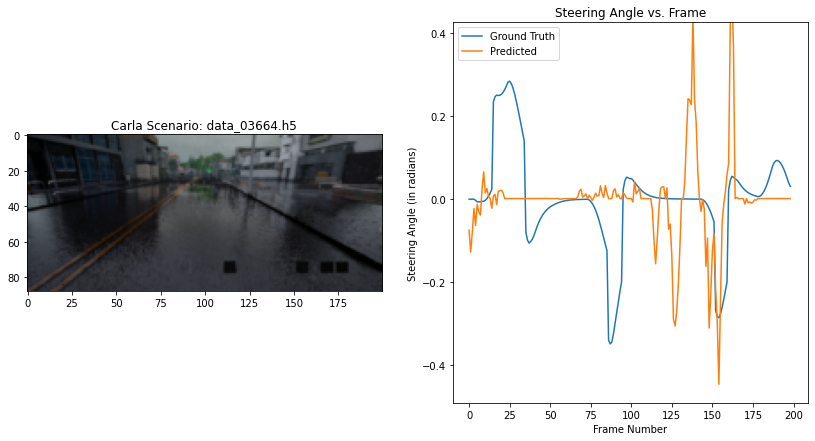

In [30]:
import cv2
import matplotlib.animation as animation
from IPython.display import display, clear_output

# Select a scene to plot
scenario = 'data_03664.h5'
sample_test_ids = test[test['Scenario Filename'] == scenario].index.values

# Get data for plots
frame = np.array(range(0, len(sample_test_ids))) 
truth_steering_angles = y_test[sample_test_ids]
pred_steering_angles = y_test_pred[sample_test_ids]
sample_imgs = X_test_imgs[sample_test_ids]

# Create the image animation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
im = ax1.imshow(X_test_imgs[0])
ax1.set_title(f'Carla Scenario: {scenario}')

dat1, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
dat2, = ax2.plot([frame.min(), frame.max()],
                 [truth_steering_angles.min() - 0.1, truth_steering_angles.max() + 0.1])
ax2.set_title('Steering Angle vs. Frame')
ax2.set_xlabel('Frame Number')
ax2.set_ylabel('Steering Angle (in radians)')
ax2.legend(['Ground Truth', 'Predicted'])

animate_image = lambda i: im.set_array(sample_imgs[i])
animate_data1 = lambda i: dat1.set_data(frame[:i], truth_steering_angles[:i])
animate_data2 = lambda i: dat2.set_data(frame[:i], pred_steering_angles[:i])

for i in range(len(frame)):
    animate_image(i)
    animate_data1(i)
    animate_data2(i)
    clear_output(wait=True)
    display(fig)
    plt.show()